<a href="https://colab.research.google.com/github/aniket15031998/Loan-Prediction-Practice-Problem-Using-Python-/blob/main/Loan_Prediction_Problemipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Loan Prediction Problem

# **Project Summarry**



Fulfillment Homes Financing, a prominent housing finance entity with a widespread presence in urban, semi-urban, and rural areas, is seeking to revolutionize its loan eligibility process. The company, specializing in home loans, envisions automating the real-time assessment of customer eligibility based on details provided in online application forms, encompassing critical factors like Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and more. This forward-looking initiative aims to employ data science and machine learning techniques to identify specific customer segments eligible for loans, facilitating targeted marketing efforts. By streamlining and optimizing the loan approval process, Fulfillment Homes Financing seeks to enhance operational efficiency and customer experience in the competitive realm of home financing.



#**Problem Statement**

### **It's a classification problem where we have to predict whether a loan would be approved or not.**


# ***1. Knowing our Data***

### Importing Libraries

In [1177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #to ignore warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Dataset Loading

In [1178]:
train=pd.read_csv('/content/drive/MyDrive/data /Loan Prediction /train_ctrUa4K.csv')
test=pd.read_csv('/content/drive/MyDrive/data /Loan Prediction /test_lAUu6dG.csv')

### Let's make a copy of the dataset so if we have to make any changes we do not lose original dataset

In [1179]:
train_copy=train.copy() #here train dataset is used for training
test_copy=test.copy() #here test dataset is used for test the results
# we don't need to split the train and test data set in this case

### Dataset First View

In [1180]:
train_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1181]:
test_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Dataset Information

In [1182]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1183]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Insights** :

1. We can see we have three format of datatypes -
object,int64 and float64

2. As we can see we have 12 independent variables and 1 dependent variable i.e Loan status in train dataset, we will use train dataset to train our model and test dataset to predict the loan status which is missing in test_data set

### Dataset Rows & Columns count

In [1184]:
train_copy.shape , test_copy.shape

((614, 13), (367, 12))

### Duplicate Values

In [1185]:
train_copy.duplicated().sum()

0

In [1186]:
test_copy.duplicated().sum()

0

### Missing Values

In [1187]:
train_copy.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1188]:
test_copy.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**Insights** : As we can see we have missing values in both the dataset and we will have to treat this issue further to aviod biased results

### Understanding our variables


In [1189]:
train_copy.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [1190]:
test_copy.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


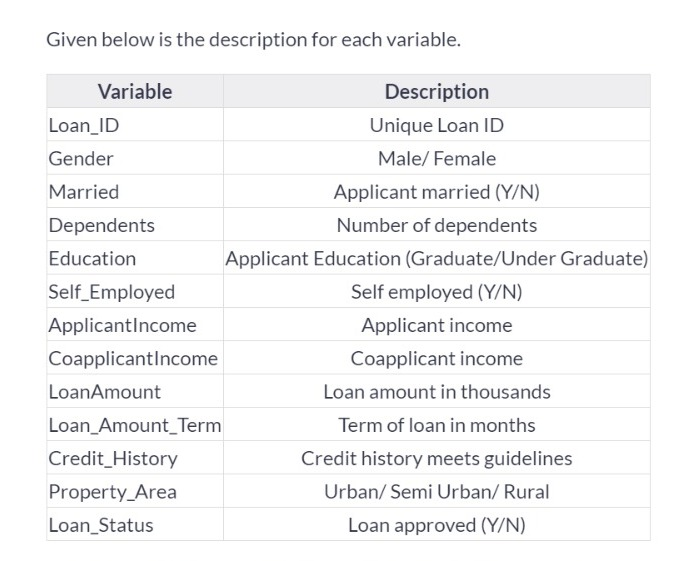

In [1191]:
train_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1192]:
test_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [1193]:
for i in list(train_copy.columns):
  print(f'Unique values for {i} : {train_copy[i].unique()}')
  print(train_copy[i].value_counts())

Unique values for Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 

In [1194]:
category_var = ['Gender','Married','Self_Employed','Credit_History']
ordinal_var = ['Dependents','Property_Area','Education']
numerical_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

# ***2. Data Vizualization, Storytelling & Experimenting with charts : Understanding the relationships between variables***

## **Univariate Analysis**

#### Chart - 1 - Target Variable

<Axes: title={'center': 'Loan_Status'}>

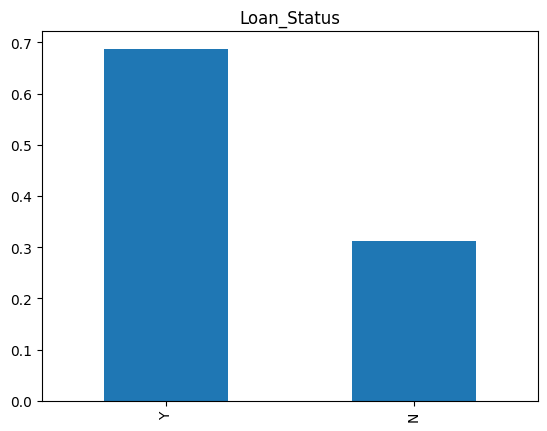

In [1100]:
train_copy['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan_Status')

**Insights**
: Almost 70% of total applications are approved leaving 30% rejected




#### Chart - 2 - Category Variable

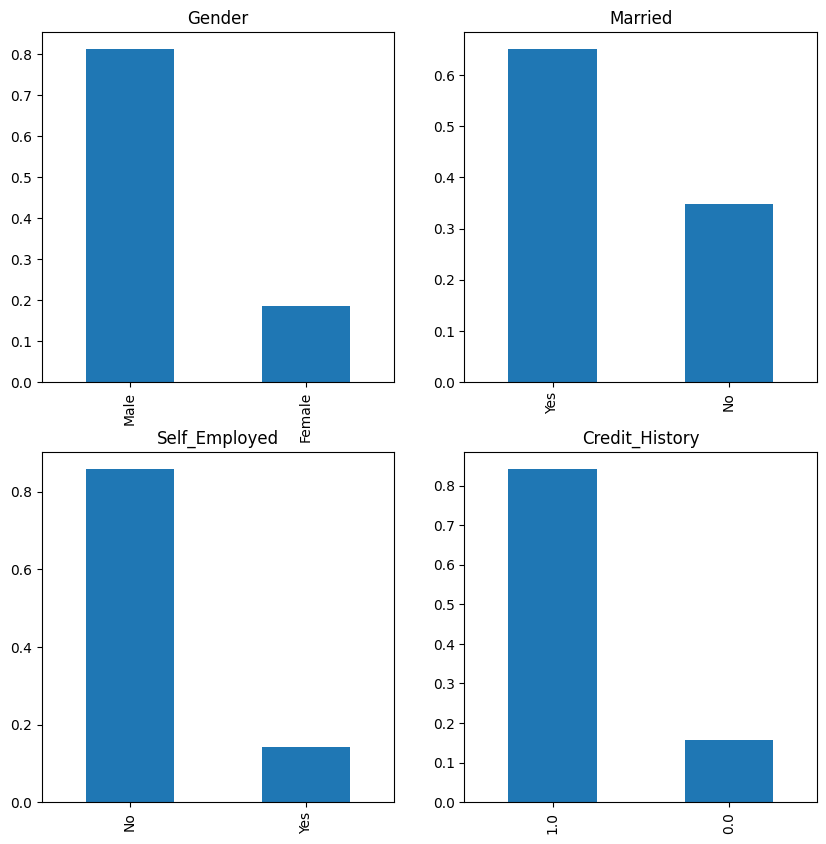

In [1101]:
plt.figure(figsize=(10,10))
counter=1

for i in category_var:
  plt.subplot(2,2,counter)
  train_copy[i].value_counts(normalize=True).plot.bar(title=i)
  counter+=1

**Insights**

1.   80% applicants in the dataset are male
2.   Around 65% applicants are married
3.   Around 15% applicants are self employed
4.   Around 85% applicants have clear credit_history i.e they had paid
their earlier debts.
5.   Most of the male applicants are married while most of the female applicants are unmarried



#### Chart - 3 - Category Variable (Comparison between Gender and Married)

<Axes: xlabel='Gender', ylabel='count'>

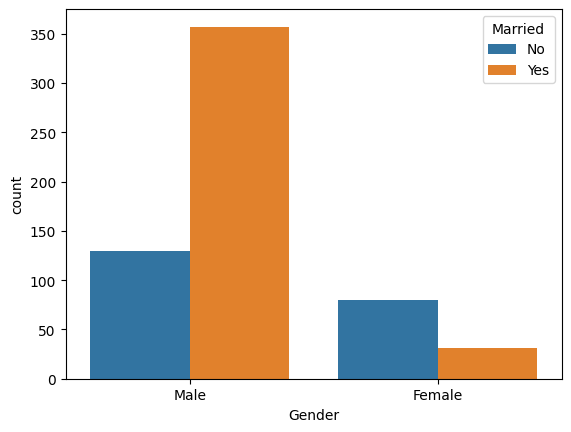

In [1102]:
sns.countplot(x=train_copy['Gender'],hue=train_copy['Married'])

#### Chart - 4 - Ordinal Variables

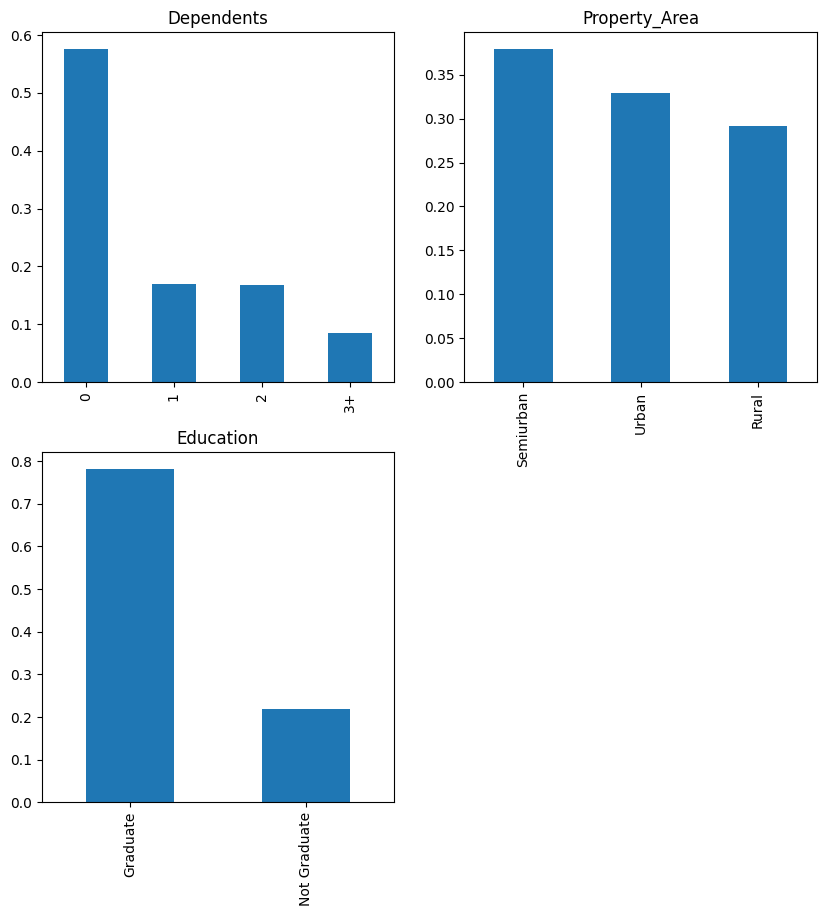

In [1103]:
plt.figure(figsize=(10,10))
counter=1

for i in ordinal_var:
  plt.subplot(2,2,counter)
  train_copy[i].value_counts(normalize=True).plot.bar(title=i)
  counter+=1

**Insights**


1.   Almost 58% applicants don't have any dependents
2.   Most of the applicants are from semi-urban area
3.   Almost 80% applicants are graduated



#### Numerical Variables

In [1104]:
numerical_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

##### Chart 5 - Numerical Var - ApplicantIncome

<Axes: title={'center': 'ApplicantIncome'}>

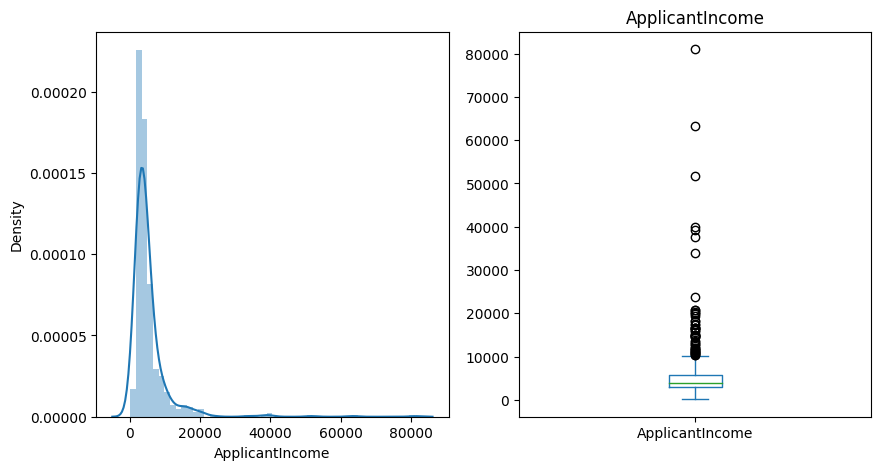

In [1105]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(train_copy['ApplicantIncome'])

plt.subplot(1,2,2)
train_copy['ApplicantIncome'].plot.box(title='ApplicantIncome')

**Insights**


1.   As we can see from distribution plot it is left skewed which means its not normal we will try to make it normal later.
2.   From box plot we can see that their are outliers due to income disparity in society



As we have seen outliers in box plot of applicant income this will be due to income disparity which will be related to education of individual.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

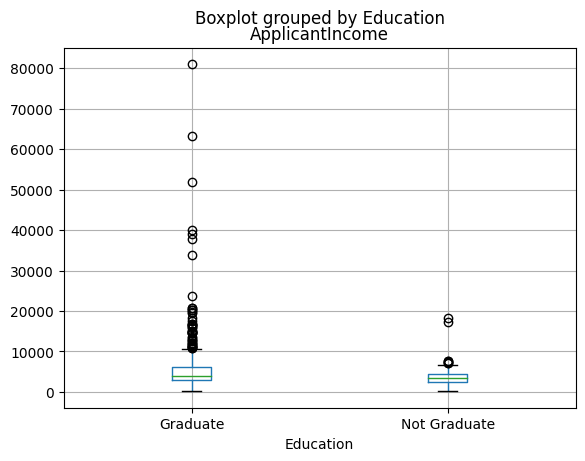

In [1106]:
train_copy.boxplot(column='ApplicantIncome',by='Education')

This graph shows graduate candidats have high income values compared to not graduated.

##### Chart 6 - Numericl Var - Coapplicant Income

<Axes: title={'center': 'CoapplicantIncome'}>

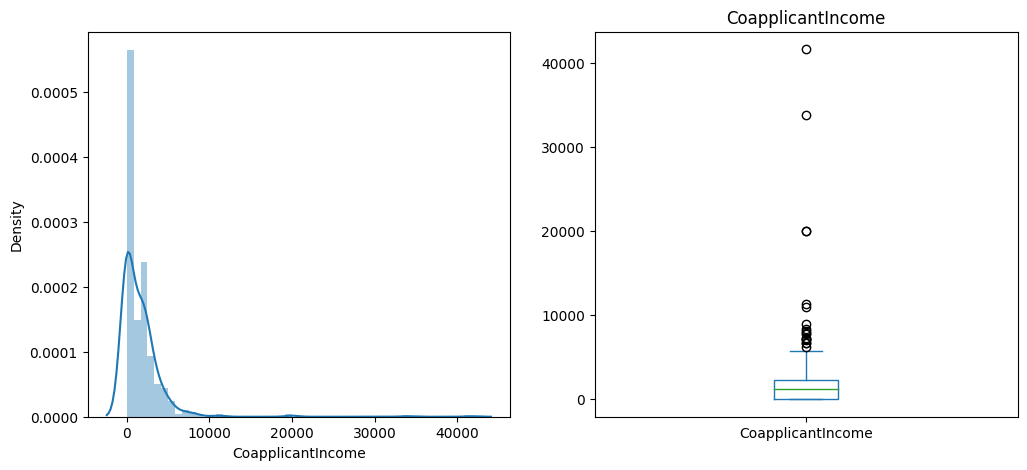

In [1107]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(train_copy['CoapplicantIncome'])

plt.subplot(1,2,2)
train_copy['CoapplicantIncome'].plot.box(title='CoapplicantIncome')

**Insights**


1.   We can that it is left skewed and not normal, also have outliers which we will treat later and make it normal.


##### Chart 7 - Numerical Var - Loan Amount

<Axes: title={'center': 'LoanAmount'}>

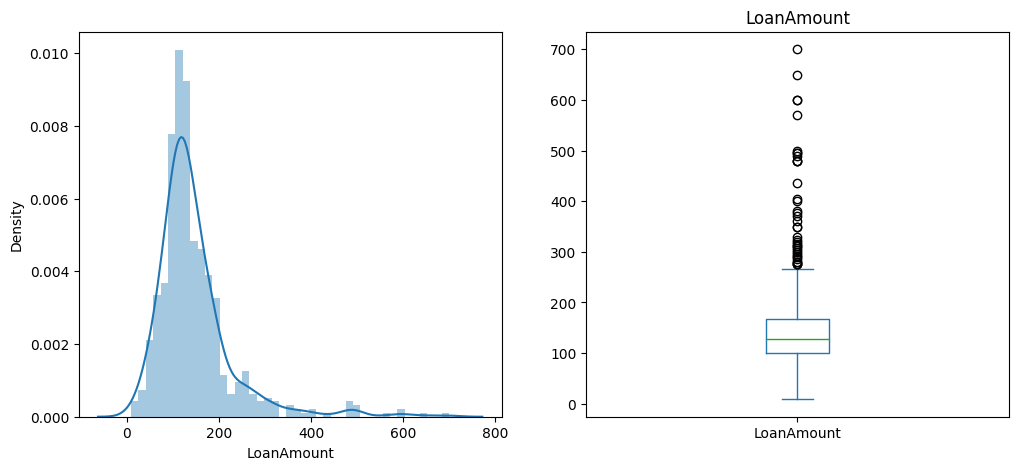

In [1108]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(train['LoanAmount'])

plt.subplot(1,2,2)
train_copy['LoanAmount'].plot.box(title='LoanAmount')

**Insights** : We can see lot of outliers in this variable , but it fairly normal distributed. We will treat outliers later

##### Chart 8 - Numerical Var - Loan Amount Term




<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

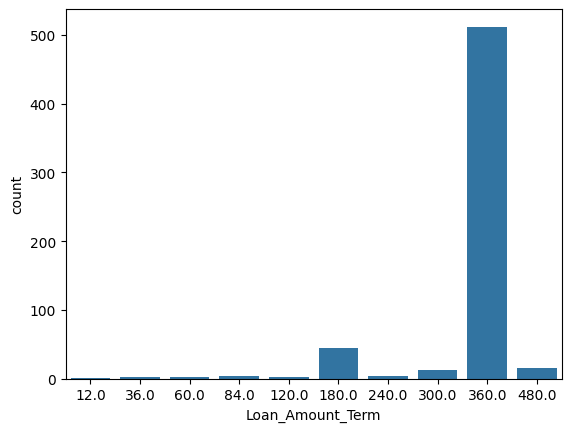

In [1109]:
sns.countplot(x=train_copy['Loan_Amount_Term'])

**Insights** : Most of the loan tenure is of 360 months.

## **Bivariate Analysis**

In this we will check relatioship between dependent variable Loan Approval with all individual variables of different categories.

### Category Independent Variable Vs Target Variable

In [1110]:
category_var = ['Gender','Married','Self_Employed','Credit_History']
ordinal_var = ['Dependents','Property_Area','Education']

#### Gender Vs Loan_Status

In [1111]:
Gender=pd.crosstab(train_copy['Gender'],train_copy['Loan_Status'])

In [1112]:
 Gender #we have grouped the gender variable information on basis of loan status

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [1113]:
Gender.div(Gender.sum(1).astype(float),axis=0)
#here we have find the total number of applications for each gender and then divide it with each category to get proportion understanding

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


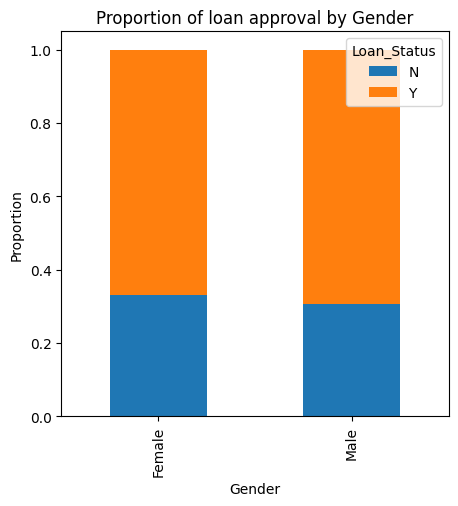

In [1114]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of loan approval by Gender')
plt.legend(title='Loan_Status',loc='upper right')

**Insights** : We can make conclusion that proportion of both female and male are same in loan approved and not approved category

#### Married Vs Loan_Status

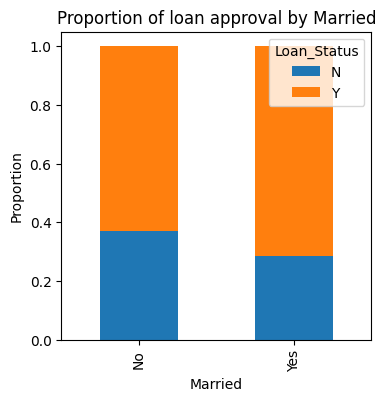

In [1115]:
Married=pd.crosstab(train_copy['Married'],train_copy['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Married')
plt.ylabel('Proportion')
plt.title('Proportion of loan approval by Married')
plt.legend(title='Loan_Status',loc='upper right')

**Insights** : Proportion of married applications are higher for approved loans

#### Self Employed Vs Loan_Status

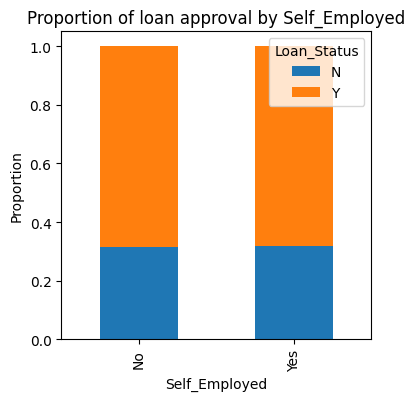

In [1116]:
Self_Employed=pd.crosstab(train_copy['Self_Employed'],train_copy['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Self_Employed')
plt.ylabel('Proportion')
plt.title('Proportion of loan approval by Self_Employed')
plt.legend(title='Loan_Status',loc='upper right')

**Insights** : Their is nothing significant we can get here.

#### Credit_History Vs Loan_Status

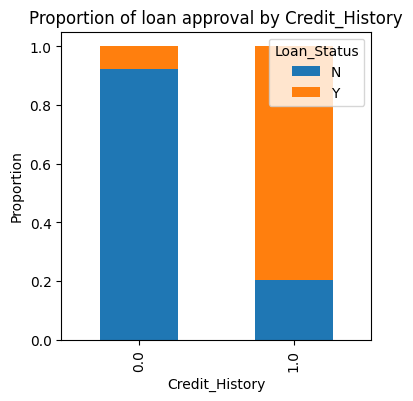

In [1117]:
Credit_History=pd.crosstab(train_copy['Credit_History'],train_copy['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Credit_History')
plt.ylabel('Proportion')
plt.title('Proportion of loan approval by Credit_History')
plt.legend(title='Loan_Status',loc='upper right')

**Insights** : Applicants having clear credit history have a high chance of getting loan approved.

#### Dependents Vs Loan_Status

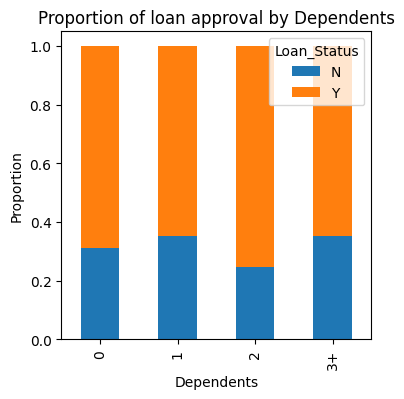

In [1118]:
Dependents=pd.crosstab(train_copy['Dependents'],train_copy['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Dependents')
plt.ylabel('Proportion')
plt.title('Proportion of loan approval by Dependents')
plt.legend(title='Loan_Status',loc='upper right')

**Insights** : Proporiton of loan approved is same across all categories of dependents

#### Property_Area Vs Loan_Status

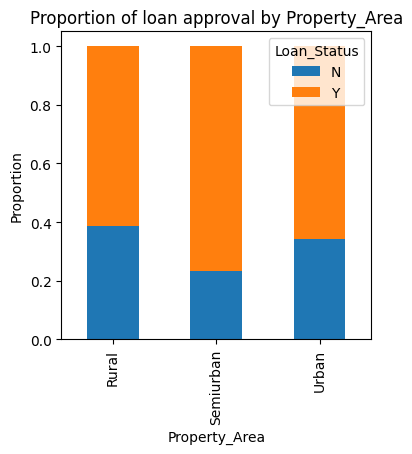

In [1119]:
Property_Area=pd.crosstab(train_copy['Property_Area'],train_copy['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Property_Area')
plt.ylabel('Proportion')
plt.title('Proportion of loan approval by Property_Area')
plt.legend(title='Loan_Status',loc='upper right')

**Insights** : Loan applications from semi_urban area have high proportion of loan approved

#### Education Vs Loan_Status

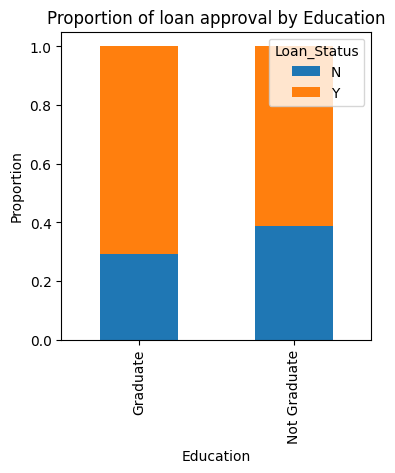

In [1120]:
Education=pd.crosstab(train_copy['Education'],train_copy['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Education')
plt.ylabel('Proportion')
plt.title('Proportion of loan approval by Education')
plt.legend(title='Loan_Status',loc='upper right')

**Insights** : Applicants who are graduated has a high chance of getting loan approved.

### Numerical Independent Variable Vs Target Variable

We try to find how income value affects the loan approval.
We will try to find is their any specific value over which loan is approed.
For this we will find mean income value for loan approved and not approved


In [1121]:
numerical_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

#### Applicant Income Vs Loan Status

In [1122]:
train_copy.groupby('Loan_Status')['ApplicantIncome'].mean().reset_index()

,Loan_Status,ApplicantIncome
0,N,5446.078125
1,Y,5384.068720


<Axes: xlabel='Loan_Status'>

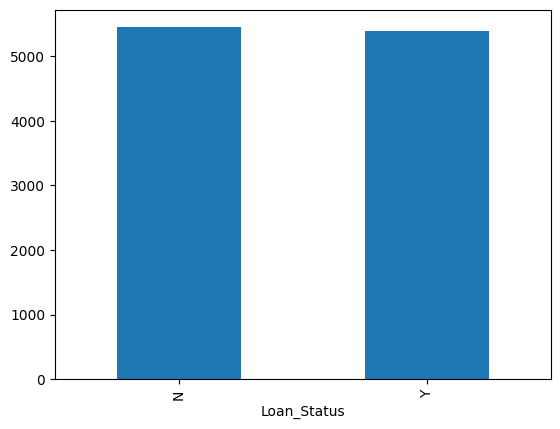

In [1123]:
train_copy.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar')

**Insights** : As we can see this approach do not give any insights hence we need to find another approach

When we observe the applicant income column in describe we see their are some income catergory group according to income range.
We will use four groups Low,Average,High,Very High
We will first divide our applicant income column in these groups

In [1124]:
bins=[0,2500,4000,6000,81000]
groups=['Low','Average','High','Very High']
train_copy['Income_bins']=pd.cut(train_copy['ApplicantIncome'],bins,labels=groups)

In [1125]:
train_copy[['ApplicantIncome','Income_bins']]

,ApplicantIncome,Income_bins
0,5849,High
1,4583,High
2,3000,Average
3,2583,Average
4,6000,High
...,...,...
609,2900,Average
610,4106,High
611,8072,Very High
612,7583,Very High


Now we will make analysis based on this Income_bins oridnal categorical variable with loan_status as we did earlier

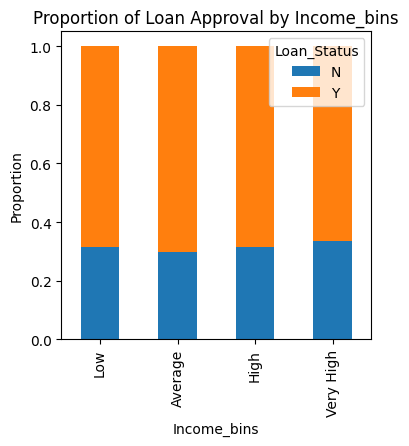

In [1126]:
Income_bins=pd.crosstab(train_copy['Income_bins'],train_copy['Loan_Status'])
Income_bins.div(Income_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Income_bins')
plt.ylabel('Proportion')
plt.title('Proportion of Loan Approval by Income_bins')
plt.legend(title='Loan_Status',loc='upper right')

**Insights** : We can see that Application Income does not affect approval status which is strange as per our hypothesis we made earlier.

#### Coapplicant Income Vs Loan Status

We will follow the same steps like Applicant Income.

As we can see that in describe fucntion we used earlier coapplicant income can have three income groups

In [1127]:
bins=[0,1000,3000,42000]
groups=['Low','Average','High']
train_copy['Coapplicant_Income_bins']=pd.cut(train_copy['CoapplicantIncome'],bins,labels=groups)

In [1128]:
train_copy[['CoapplicantIncome','Coapplicant_Income_bins']]

,CoapplicantIncome,Coapplicant_Income_bins
0,0.0,NaN
1,1508.0,Average
2,0.0,NaN
3,2358.0,Average
4,0.0,NaN
...,...,...
609,0.0,NaN
610,0.0,NaN
611,240.0,Low
612,0.0,NaN


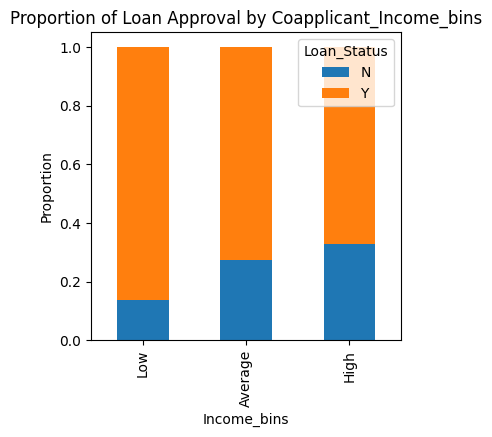

In [1129]:
Coapplicant_Income_bins=pd.crosstab(train_copy['Coapplicant_Income_bins'],train_copy['Loan_Status'])
Coapplicant_Income_bins.div(Coapplicant_Income_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Income_bins')
plt.ylabel('Proportion')
plt.title('Proportion of Loan Approval by Coapplicant_Income_bins')
plt.legend(title='Loan_Status',loc='upper right')

**Insights** : As we can the graph is showing that applicant whose coapplicant with low income has high chance of loan appoval which does not make sense.

We will try to combine applicant income and coapplicant income to check the effects on loan status

Lets us combine the applicant and coapplicant income

#### Total Income

In [1130]:
train_copy['Total_Income']=train_copy['ApplicantIncome']+train_copy['CoapplicantIncome']

Now we will check the changes in our dataset to find the total income groups

In [1131]:
train_copy.describe() #this shows only numeric data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000


In [1132]:
bins=[0,2500,4000,6000,8100]
groups=['Low','Average','High','Very High']
train_copy['Total_Income_bins']=pd.cut(train_copy['Total_Income'],bins,labels=groups)


In [1133]:
train_copy[['Total_Income','Total_Income_bins']]

,Total_Income,Total_Income_bins
0,5849.0,High
1,6091.0,Very High
2,3000.0,Average
3,4941.0,High
4,6000.0,High
...,...,...
609,2900.0,Average
610,4106.0,High
611,8312.0,NaN
612,7583.0,Very High


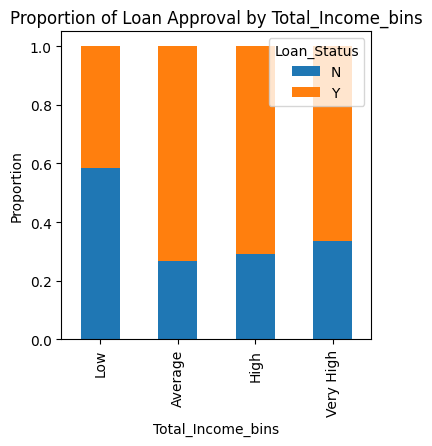

In [1134]:
Total_Income_bins=pd.crosstab(train_copy['Total_Income_bins'],train_copy['Loan_Status'])
Total_Income_bins.div(Total_Income_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Total_Income_bins')
plt.ylabel('Proportion')
plt.title('Proportion of Loan Approval by Total_Income_bins')
plt.legend(title='Loan_Status',loc='upper right')

**Insights** : It can be seen that porportion of loan approval is high for applicants with high income compared to low income

#### Loan Amount Vs Loan Status

As earlier we will built bins here also

In [1135]:
bins=[0,100,200,700]
groups=['Low','Average','High']
train_copy['LoanAmount_bins']=pd.cut(train_copy['LoanAmount'],bins,labels=groups)

In [1136]:
train_copy[['LoanAmount','LoanAmount_bins']]

,LoanAmount,LoanAmount_bins
0,NaN,NaN
1,128.0,Average
2,66.0,Low
3,120.0,Average
4,141.0,Average
...,...,...
609,71.0,Low
610,40.0,Low
611,253.0,High
612,187.0,Average


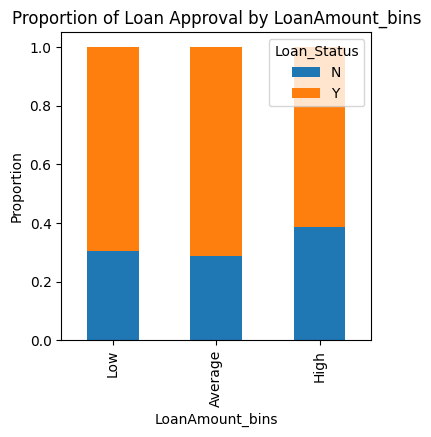

In [1137]:
LoanAmount_bins=pd.crosstab(train_copy['LoanAmount_bins'],train_copy['Loan_Status'])
LoanAmount_bins.div(LoanAmount_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('LoanAmount_bins')
plt.ylabel('Proportion')
plt.title('Proportion of Loan Approval by LoanAmount_bins')
plt.legend(title='Loan_Status',loc='upper right')

**Insights** : We can conclude from the graph that proportion of loan approval is high when loan amount is low and average which make sense and matches our hypothesis

### Now we will drop all extra created columsn by us for EDA process and will change 3+ in dependents to 3 to make it numeric which supports easy calculations

We have to drop Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins,LoanAmount_bins

In [1138]:
train_copy=train_copy.drop(['Income_bins','Coapplicant_Income_bins','Total_Income','Total_Income_bins','LoanAmount_bins'],axis=1)

In [1139]:
train_copy['Dependents'].replace('3+',3,inplace=True)
test_copy['Dependents'].replace('3+',3,inplace=True)
train_copy['Loan_Status'].replace('Y',1,inplace=True)
train_copy['Loan_Status'].replace('N',0,inplace=True)

In [1140]:
train_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## **Multivariate Analysis**

<Axes: >

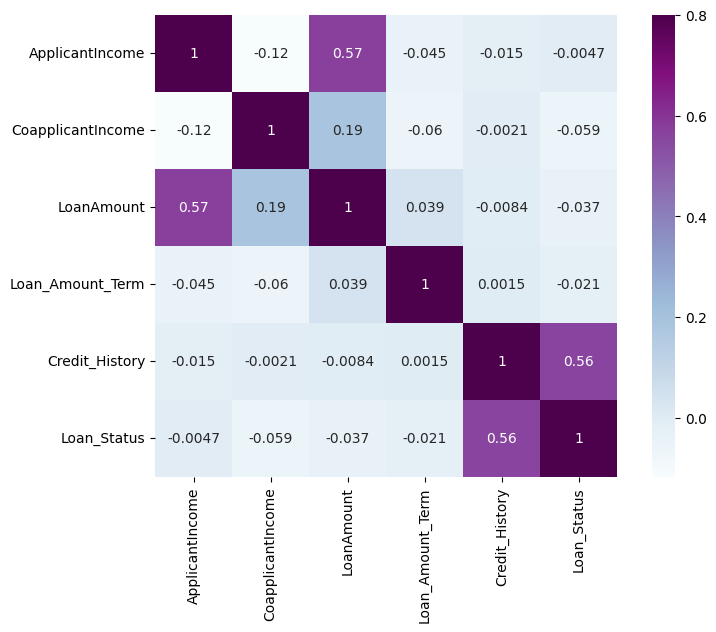

In [1141]:
#Correlation Heatmap
corr=train_copy.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr,square=True, cmap='BuPu',vmax=0.8,annot=True)

**Insights** : ApplicantIcnome - Loan Amount are highly correleated
               Credit Histroy - Loan_Status are correleated
               Coapplicant Income - Loan_Status are coreleated

# ***3. Missing Values and Outliers Treatment***!

## **Missing Values Treatment** :

As we have seen in Know Your Data section Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term and Credit_History columns has missing values

Missing values are treated in two ways:


1.   For numerical data : imputation using mean or median
2.   For categorical data : imputation using mode





### **Categorical Variables**

We will try to impute these variables with respective mode for Dependents we will use the same method because we want to fill most common value

In [1142]:
train_copy['Gender'].fillna(train_copy['Gender'].mode()[0],inplace=True)
train_copy['Married'].fillna(train_copy['Married'].mode()[0],inplace=True)
train_copy['Dependents'].fillna(train_copy['Dependents'].mode()[0],inplace=True)
train_copy['Self_Employed'].fillna(train_copy['Self_Employed'].mode()[0],inplace=True)
train_copy['Credit_History'].fillna(train_copy['Credit_History'].mode()[0],inplace=True)

For Loan_Amount_Term even if it is numeric value we will use mode as we have seen earlier in Understanding Varibales section the most common value in this column is 360 so we will impute with this value which is mode itself.

In [1143]:
train_copy['Loan_Amount_Term'].fillna(train_copy['Loan_Amount_Term'].mode()[0],inplace=True)

### **Numerical Variables**

For numeric variables we have two options to impute mean and median.
For our last remaining column LoanAmount we have seen earlier that it has outliers and hence mean is not good choice to impute as it is biased by these outliers and hence we choose medina to impute

In [1144]:
train_copy['LoanAmount'].fillna(train_copy['LoanAmount'].median(),inplace=True)

### We will repeat the same for test data also

In [1145]:
test_copy['Gender'].fillna(test_copy['Gender'].mode()[0],inplace=True)
test_copy['Married'].fillna(test_copy['Married'].mode()[0],inplace=True)
test_copy['Dependents'].fillna(test_copy['Dependents'].mode()[0],inplace=True)
test_copy['Self_Employed'].fillna(test_copy['Self_Employed'].mode()[0],inplace=True)
test_copy['Credit_History'].fillna(test_copy['Credit_History'].mode()[0],inplace=True)
test_copy['Loan_Amount_Term'].fillna(test_copy['Loan_Amount_Term'].mode()[0],inplace=True)
test_copy['LoanAmount'].fillna(test_copy['LoanAmount'].median(),inplace=True)

## **Outlier Treatment** :

We have seen in our univariate analysis that numerical variables has outliers.

All the three ApplicantIncome , CoapplicantIncome and LoanAmount are left skewed.

We will perform logarithmic transformation to deal with this issue.

<Axes: >

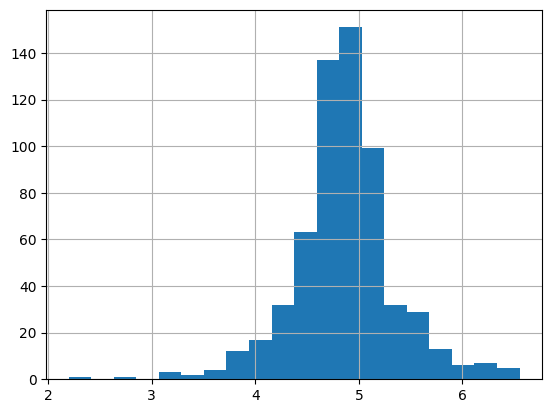

In [1146]:
train_copy['LoanAmount_log']=np.log(train_copy['LoanAmount'])
train_copy['LoanAmount_log'].hist(bins=20)

<Axes: >

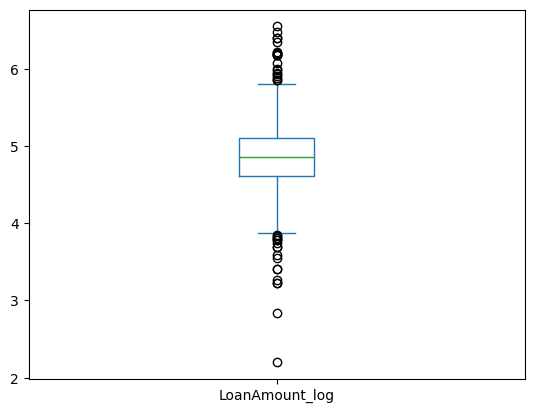

In [1147]:
train_copy['LoanAmount_log'].plot(kind='box')

In [1148]:
test_copy['LoanAmount_log']=np.log(test_copy['LoanAmount'])

In [1149]:
train_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109


# ***4. Model Building Part 1***

We will perform logistic regression as its the basic one in terms of classification model which predicts binary outcome.

Lets first clean and prepare our dataset more.

We don't need LoanID column so we will drop this column.

We will also convert our categorical variables to dummies i.e encoding process as it makes easier to compare and analyse the data


In [1150]:
train_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109


In [1151]:
train_copy=train_copy.drop(['Loan_ID'],axis=1)
test_copy=test_copy.drop(['Loan_ID'],axis=1)

For Logistic regression we need independent variables and dependent variabels separate

In [1152]:
X=train_copy.drop(['Loan_Status'],axis=1)
Y=train_copy['Loan_Status']

In [1153]:
X=pd.get_dummies(X)
train_copy=pd.get_dummies(train_copy)
test_copy=pd.get_dummies(test_copy)

Now we will split the dataset in 70:30 ratio and then will fit Logistic Regression model

In [1154]:
X_train,X_cv,Y_train,Y_cv=train_test_split(X,Y,test_size=0.3,random_state=1)
lr_model=LogisticRegression()
lr_model.fit(X_train,Y_train)

LogisticRegression()

Now lets check what predictions are based on the validation set which we created in split

In [1155]:
pred_cv=lr_model.predict(X_cv)

In [1156]:
pred_cv

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

Its time to check out model performance using metric accuracy_score which gives what proportion values where predicted correct

In [1157]:
accuracy_score(pred_cv,Y_cv)

0.7945945945945946

So we have almost 80% accuracy. Lets make prediction on test data set so we can submit this file on dashboard of Analytics Vidhya so we can get the results

In [1158]:
pred_test=lr_model.predict(test_copy)

In [1159]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

Lets Import the submission file and upload above results to it

In [1160]:
submission=pd.read_csv('/content/drive/MyDrive/data /Loan Prediction /sample_submission_49d68Cx.csv')

In [1161]:
submission.shape

(367, 2)

In [1162]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test['Loan_ID']

In [1163]:
submission.replace(1,'Y',inplace=True)
submission.replace(0,'N',inplace=True)

In [1164]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [1165]:
submission.to_csv('logistic.csv',index=False)

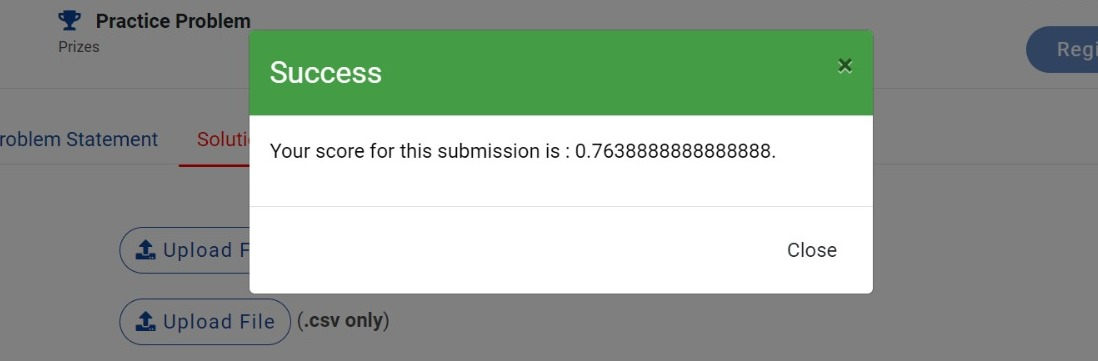

# ***5. Feature Engineering***

As we discussed in bivariate analysis total income feature helps more in making analysis so we will do some feature engineering and will add three new feature

Total_Income

EMI

Balance_Income

## **Total_Income**

In [1166]:
train_copy['Total_Income']=train_copy['ApplicantIncome']+train_copy['CoapplicantIncome']
test_copy['Total_Income']=test_copy['ApplicantIncome']+test_copy['CoapplicantIncome']

<Axes: xlabel='Total_Income', ylabel='Density'>

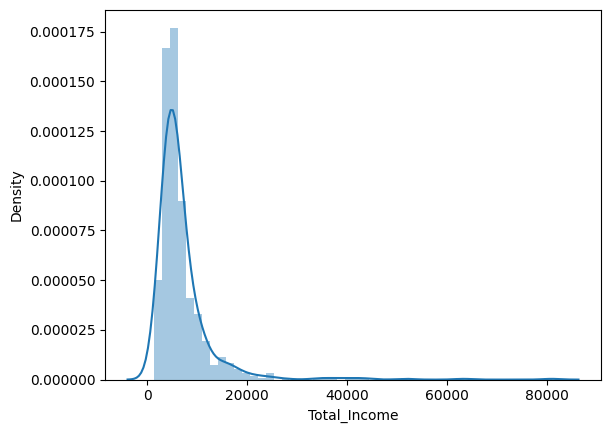

In [1167]:
sns.distplot(train_copy['Total_Income'])

**Insights** : It skewed hence we will perform log transformation

In [1168]:
train_copy['Total_Income_log']=np.log(train_copy['Total_Income'])

In [1169]:
test_copy['Total_Income_log']=np.log(test_copy['Total_Income'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

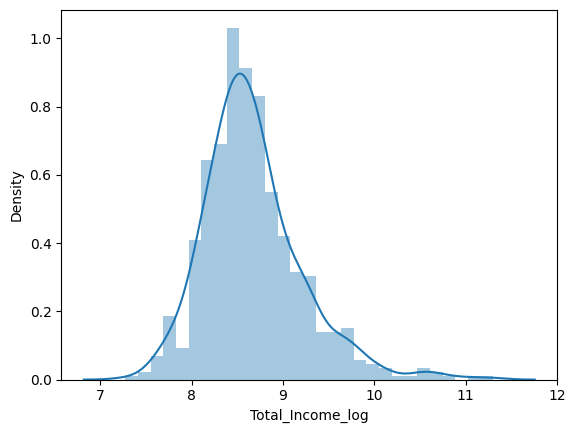

In [1170]:
sns.distplot(train_copy['Total_Income_log'])

## **EMI**

In [1171]:
train_copy['EMI']=train_copy['LoanAmount']/train_copy['Loan_Amount_Term']
test_copy['EMI']=test_copy['LoanAmount']/test_copy['Loan_Amount_Term']

<Axes: xlabel='EMI', ylabel='Density'>

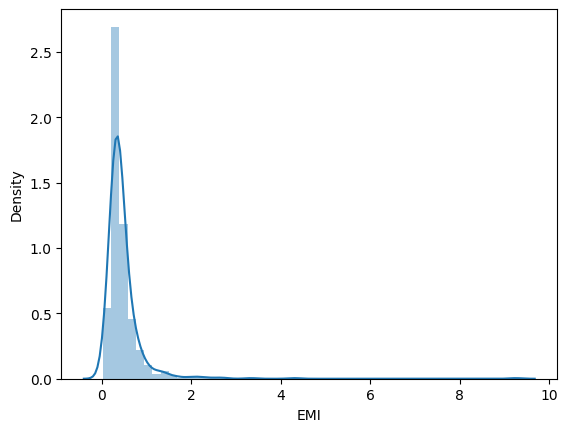

In [1172]:
sns.distplot(train_copy['EMI'])

We will follow the same process followed earlier

## **Balance_Income**

In [1173]:
train_copy['Balance_Income']=train_copy['Total_Income']-(train_copy['EMI']*1000)
test_copy['Balance_Income']=test_copy['Total_Income']-(test_copy['EMI']*1000)

<Axes: xlabel='Balance_Income', ylabel='Density'>

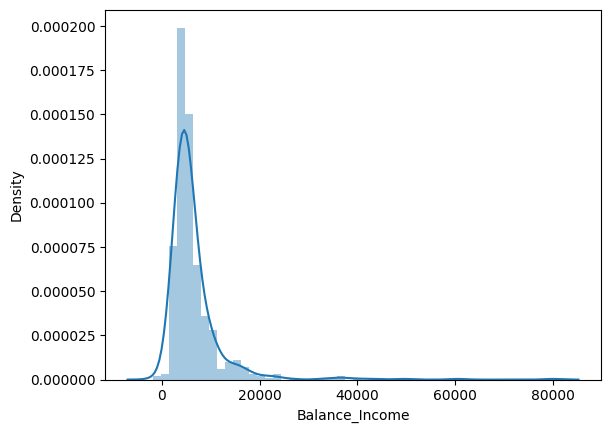

In [1174]:
sns.distplot(train_copy['Balance_Income'])

## We will drop the data used to create these columns as this may create problems due to their relationship

In [1175]:
train_copy=train_copy.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [1176]:
test_copy=test_copy.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)